# Consildation of Genres 

As expected, after running our baseline models, we saw the need to remove and consolidate some of our genres in order to help the model differentiate between these categories given the limited attributes. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading in our cleaned dataset 
spotify_cleaned = pd.read_csv('~/Desktop/CapstoneProject/spotify_cleaned_final.csv', index_col=0)

In [3]:
# Making a copy - we will eventually save this DataFrame to a csv file that we can use for modeling. 
consolidated_spotify = spotify_cleaned.copy()

In [4]:
# Transforming the 'explicit' column from bool to binary
consolidated_spotify['explicit'] = consolidated_spotify['explicit'].astype(int)

In [5]:
# Looking at our unique genres 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

We are going to start off by removing some genres of music that are probably a combination of noise (like nature sounds, white noise, etc.) and "soothing" or "relaxing" songs that overlap with other genres present in our dataset. 
- ambient 
- study 
- sleep 
- sad 
- happy

Let's check then out just to be sure. 

## Sleep 

In [6]:
# All songs from the 'sleep' genre
sleep = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'sleep']
sleep

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
101000,07UDTaRYJAsIhUZTyZSUzM,Huma,Ons,Ons,71,193239,0,0.1110,0.018500,0,-32.335,1,0.0424,0.957,0.940,0.087,0.04590,76.153,3,sleep
101001,0CMYUXTTTmI6Lwc0opH2XG,Sohn Aelia,Herinneringen,Herinneringen,74,172357,0,0.0685,0.003420,0,-37.156,1,0.0418,0.990,0.910,0.106,0.05810,73.644,1,sleep
101002,5LEHlRPjGcZ5RdagAwXpHS,Little Circuits,Beautiful Imagination,Beautiful Imagination,71,143052,0,0.1020,0.033300,3,-34.177,1,0.0476,0.797,0.927,0.111,0.05910,89.605,4,sleep
101003,58xXb7ASilQ9WYtninubrY,White Noise for Babies,Thinned Phaser,Aqua,0,157024,0,0.2400,0.011900,6,-33.515,0,0.0760,0.995,0.828,0.103,0.03580,138.009,4,sleep
101004,6kOJ0Ylenwr6Up0g4lDORg,White Noise for Babies,Rising Sun,Rising Sun,0,180000,0,0.1350,0.000804,4,-34.772,1,0.0507,0.968,0.728,0.108,0.03460,141.930,5,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101994,5BVK02c2QI9ODFm8liVSdw,Rain Sounds;Spa & Spa;Nature Sounds Nature Music,18 Relaxing Rain Sounds - No Fade,10 Minute Loopable Heavy Rain,32,591807,0,0.1080,0.774000,10,-17.200,0,0.0725,0.435,0.992,0.716,0.01820,93.952,4,sleep
101996,3OwZ8e7lb5Assv14ZRW1rU,Rain Sounds,Soft Rain Sleep,Forrest Rain,32,102649,0,0.4680,0.993000,10,-24.274,0,0.0386,0.250,0.945,0.932,0.00964,49.296,4,sleep
101997,3QZrgBLusdGcYJtST0ucXX,Rain Sounds,White Noise Rain,White Noise Rain,32,173608,0,0.1740,0.895000,2,-24.459,1,0.0468,0.172,0.919,0.875,0.00001,86.752,5,sleep
101998,6hD4qRIXuuD2cM7vX6eV23,Meeresrauschen,"Meeresrauschen zur Entspannung, für Meditation...",Relax,32,120353,0,0.1880,0.999000,10,-18.900,1,0.0510,0.474,0.988,0.929,0.00001,60.837,3,sleep


There is a total of 945 tracks. Already from glancing at the top and bottom, we can see track and album titles like "White Noise for Babies", "Rain Sounds." Let's check out a random sample of rows. 

In [7]:
# 100 random rows from sleep genre 
sleep.sample(100)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
101710,0RVsJTnSwdLQ6F8ruukszk,Sanja Göransson,Sömn,Sömn,60,168000,0,0.1860,0.00308,3,-36.144,1,0.0448,0.986000,0.87900,0.1120,0.03960,96.221,4,sleep
101442,24ScIVXgdaSX3qijPR6HFP,Rain Sounds,"Rain Sounds: Rain Sound Meditation, Relaxing S...",Thunderstorm Sounds,38,360000,0,0.1640,0.54700,10,-20.848,0,0.0759,0.000081,0.96900,0.3570,0.02330,114.325,4,sleep
101788,2Sc3sIkupL2IztZkjOsRk0,White Noise Sleep Sounds,Calm White Noise,Deep Relaxing White Noise,33,97215,0,0.2000,0.54500,1,-23.633,1,0.0807,0.934000,0.99700,0.1120,0.03090,82.769,4,sleep
101669,3S3PRPDhfJRU9P1uiaTWqr,White Noise for Babies;White Noise Baby Sleep;...,"White Noise, etc",Night Stream With Crickets - Loopable With No ...,34,74098,0,0.2290,0.78000,2,-37.282,0,0.0578,0.809000,0.94900,0.7030,0.00919,125.686,5,sleep
101185,38tHo9IknhGb1u054ffmZC,Traditional;Royal Philharmonic Orchestra,"Classical Christmas, Vol. 1",It Came Upon the Midnight Clear (Remastered 2014),0,148973,0,0.2200,0.24600,2,-13.797,1,0.0362,0.968000,0.08340,0.5680,0.15600,126.981,3,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101982,1jKP1mutaJ3g8ncppL1dpB,White Noise Baby Sleep;White Noise for Babies,"!!"" White Noise 10 Hours ""!!",White Noise For Sleeping,31,161500,0,0.0874,0.00002,10,-15.870,0,0.1570,0.120000,0.00206,0.7540,0.00000,86.782,4,sleep
101491,5ZoAAoDRIhxeE7Oozvla3M,Granular,Brown Noise DLX,Brown Noise Hollow 180 hz,37,134427,0,0.1970,0.03490,1,-32.108,0,0.0875,0.967000,0.24900,0.1120,0.02190,123.658,1,sleep
101717,6Di2mEmryP7AAak4VZMLVJ,Mia Pandosa,Within the Light (Ambient Version),Within the Light,61,149765,0,0.0881,0.00356,5,-33.389,1,0.0435,0.985000,0.96400,0.1490,0.05140,78.987,1,sleep
101318,7M7YsLJWsyu87my5ZnAxau,Sailors Of The 7 Seas,Shape Of A Dream,Shape Of A Dream,62,186218,0,0.1400,0.00695,8,-35.659,1,0.0418,0.983000,0.88500,0.1190,0.09250,74.833,4,sleep


This confirms my thought above. In addition to white noise and nature sounds we also see a mix of classical music. 

In [8]:
# Songs of classical genre
classical = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'classical']

In [9]:
# Shape of this genre 
classical.shape

(759, 20)

We have a descent amount of tracks in our classical genre. I see no need to move any of these songs to more "appropriate" genres. Let's go ahead and remove this genre, `sleep` from our data set. 

In [10]:
sleep_index = list(sleep.index)

In [11]:
# Removing any song with 'sleep' as a genre from the DataFrame
consolidated_spotify.drop(sleep_index, inplace=True)

In [12]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

We no longer have 'sleep' as a genre. Let's move onto study music. 

 ## Study 


In [13]:
# All songs from the genre 'study'
study = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'study']

In [14]:
study

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
105000,6qbe2xJVwt7wwpeocsrVvc,Talented Mr Tipsy,Ritual,Ritual,53,173333,0,0.657,0.717,10,-6.007,0,0.1990,0.7510,0.878,0.1740,0.401,90.076,4,study
105001,5ZOwkvgMAeI0G2USq0cIFQ,O k O,neomatter,neomatter,49,104433,0,0.670,0.371,4,-13.830,0,0.1410,0.5700,0.891,0.1270,0.100,83.030,3,study
105002,2L2aSrua8ZBRMogFhF6I1Q,4to28,Elastic,Elastic,50,121600,0,0.736,0.410,5,-14.587,0,0.0528,0.0361,0.854,0.3800,0.587,112.509,3,study
105003,1tNwm7phOIMzGC1VO9Dggr,Joi Casette,One Two Tree,One Two Tree,47,121875,0,0.797,0.263,6,-13.089,0,0.1060,0.5760,0.786,0.9180,0.379,80.014,4,study
105004,4wkQzdybc3qK4nNaxHLzvO,hope mona,humify,humify,47,161032,0,0.496,0.198,3,-18.740,1,0.3230,0.9470,0.885,0.0933,0.341,77.168,4,study
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105995,0p9HloqJbkgokaktOhiwkn,"Sarah, the Illstrumentalist",FLOWERS,Chamomile,6,140199,0,0.640,0.296,3,-9.142,0,0.0314,0.0238,0.896,0.1530,0.337,112.018,5,study
105996,2RpHErrNFoo8A7MKAQS7tD,DGHTR,HoriZon Butterfly,Red Maple,2,119111,0,0.814,0.226,0,-13.278,1,0.1010,0.4930,0.904,0.4460,0.200,135.046,4,study
105997,2nHUre6dQezPvxBkeTAba5,"Sarah, the Illstrumentalist",Constellations,Capricornus,6,142521,0,0.769,0.716,11,-8.844,0,0.0514,0.0161,0.946,0.1520,0.598,137.995,4,study
105998,63QCKDyQB7OoiWOfwWkysb,"Sarah, the Illstrumentalist",Pocket Full of Crystals: Vol 2,Orange Jasper,6,145000,0,0.675,0.694,9,-7.689,0,0.0838,0.4450,0.928,0.1090,0.625,179.960,4,study


We have 996 tracks in this genre. it's a bit difficult to see the songs looking at the top and bottom. Let's again look at a sample of 100 rows. 

In [15]:
pd.set_option('display.max_rows', 299)

In [16]:
# 100 random rows from study genre
study.sample(100)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
105013,553ntYSPcu70QIRXtBjAHD,Moodula,Echo Cliff,Peach Sky,48,124235,0,0.497,0.287,9,-13.128,0,0.0331,0.64100,0.89900,0.1170,0.2050,84.935,4,study
105900,5hF7NM66HCipVccI3HbCFy,hope mona,trick or treat on beat,Monster Mash - Lo-Fi,0,148656,0,0.694,0.373,7,-13.988,1,0.1390,0.67700,0.95000,0.1290,0.3090,134.194,4,study
105943,12VM3ZHZoDN0Lr9A2TAkeD,Timothy Infinite,Hasta Luego,Lo Siento,5,141704,0,0.793,0.610,2,-6.066,0,0.0588,0.00186,0.83700,0.0749,0.5130,110.017,4,study
105328,1nvfLfYYMaqp727vk7SQdn,Synkop,Firetree,Unfocused,35,85354,0,0.649,0.321,8,-12.661,1,0.0705,0.94600,0.87100,0.1570,0.0826,179.763,5,study
105737,4pOhrR41evOnRyXhjeGqw1,Sless Praismo;Frogman,Office Vibe,Office Vibe,34,147096,0,0.774,0.113,2,-10.678,0,0.0486,0.11100,0.59800,0.1550,0.3340,92.977,4,study
105195,7uJKZCjiHRAde6xQm2Kx0Q,Beat Oven,Kid Tested & Mother Approved,Royal Highness,41,128729,0,0.754,0.422,9,-12.660,1,0.2940,0.04630,0.21500,0.1080,0.5170,160.227,4,study
105289,4hRlr5mM9z0szgLB2PBfc5,Matt Large,Stances,Yes Yes Y'all,14,144108,0,0.701,0.495,7,-7.106,1,0.4420,0.00787,0.29000,0.0796,0.8100,191.993,4,study
105311,563eOsTuwa7hZomJl7AI4A,Matt Large,Conant Gardens,Conant Gardens,36,162716,0,0.770,0.620,11,-6.435,0,0.1090,0.03600,0.84800,0.0870,0.5420,86.987,4,study
105701,7n4Ou2dY7blyiZyR1S6M2k,wavcrush,a daffodil a day,daffodils,33,137000,0,0.590,0.287,8,-14.677,0,0.1360,0.14900,0.85800,0.1100,0.3290,120.043,4,study
105705,6IGI55MLcRfsr9SwspazhZ,Jobii,Sisel,Slapperoni Pizza,21,131315,0,0.403,0.463,8,-7.071,1,0.1540,0.55800,0.84300,0.1120,0.3410,166.072,4,study


I am not familiar with the artsits, albums, or tracks in this genre. But we can look at the numeric features and see if we notice any trends. 

In [17]:
# Summary stats 
study.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,996.000000,996.000000,996.0,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,26.152610,141592.863454,0.0,0.685067,0.411024,5.427711,-10.846727,0.501004,0.100187,0.530086,0.789227,0.161438,0.402181,111.776734,3.942771
std,14.121255,33766.767066,0.0,0.099322,0.168141,3.629000,3.586343,0.500250,0.093228,0.311927,0.212534,0.126922,0.213660,35.636203,0.332098
min,0.000000,68500.000000,0.0,0.331000,0.028200,0.000000,-25.150000,0.000000,0.025600,0.000386,0.000016,0.035400,0.035100,30.322000,1.000000
25%,11.000000,121452.250000,0.0,0.629000,0.287000,2.000000,-13.248750,0.000000,0.044400,0.256000,0.785000,0.102000,0.233750,82.999750,4.000000
50%,28.000000,138666.000000,0.0,0.695000,0.397000,6.000000,-10.319500,1.000000,0.065700,0.570000,0.866500,0.114000,0.384500,92.040000,4.000000
75%,37.000000,157710.750000,0.0,0.752000,0.519500,9.000000,-8.012000,1.000000,0.112250,0.811250,0.909250,0.157000,0.548500,141.995500,4.000000
max,55.000000,307246.000000,0.0,0.937000,0.959000,11.000000,-3.343000,1.000000,0.743000,0.990000,0.975000,0.918000,0.970000,208.060000,5.000000


With the exception of loudness and instrumentalness, there tends to be a wider range of values. Seeing as these songs are from different genres but deemed to be appropriate for studying we can go ahead and remove these to improve the performance of our model. 

In [18]:
study_index = list(study.index)

In [19]:
# Removing 'study' genre
consolidated_spotify.drop(study_index, inplace=True)

In [20]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Let's move onto 'ambient'. 

## Ambient 

In [21]:
# All the ambient music
ambient = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'ambient']

In [22]:
# Random 150 rows from this genre
ambient.sample(150)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4821,2fWCXfSnr07XKJAfPWlevl,Brambles,Charcoal,Pink And Golden Billows,50,178973,0,0.3870,0.06160,7,-23.838,0,0.0422,0.990000,0.915000,0.0580,0.2790,209.852,3,ambient
4429,7gbdU7Cuj07lHi0qW0vZcG,Bethel Music;kalley,We Will Not Be Shaken (Live),Ever Be - Live,54,322326,0,0.3940,0.56000,2,-6.925,1,0.0281,0.001620,0.000582,0.1070,0.1070,138.057,4,ambient
4160,7gbSDq9luQx6yVl7HyJGIW,Peter Sandberg,Dismantle,Dismantle,61,115578,0,0.3990,0.13600,3,-20.219,1,0.0307,0.985000,0.895000,0.1560,0.3960,100.195,3,ambient
4646,7qIqOFDgHqCC2xSkvU77xV,Little Symphony,Serenity,Devdari,27,68571,0,0.1970,0.12200,5,-23.756,1,0.0496,0.822000,0.836000,0.1150,0.3070,86.216,3,ambient
4431,5shiLLxKQ4U7XLELZeXzxy,Novo Amor;Ed Tullett;Lowswimmer,Heiress,Terraform,50,251920,0,0.4750,0.21800,11,-11.490,1,0.0304,0.979000,0.385000,0.2820,0.1930,71.967,4,ambient
4767,1OD2YXIOmfYmBAYfV1maRV,Leon Vynehall,Nothing Is Still,Movements (Chapter III),55,231640,0,0.5200,0.30400,11,-15.255,0,0.0284,0.816000,0.366000,0.0948,0.0392,103.981,4,ambient
4894,4GLAzhUlcVkLr0BGvjU74G,Chilly Gonzales,Solo Piano III,Famous Hungarians,25,125106,0,0.4550,0.10300,5,-21.069,0,0.0437,0.980000,0.927000,0.1170,0.0378,66.104,3,ambient
4940,7xsirhcgFWOnItsGuBfrv9,Bethel Music;Steffany Gretzinger,For the Sake of the World,Closer,49,413573,0,0.3220,0.55800,4,-8.321,1,0.0306,0.059600,0.000160,0.1020,0.0813,139.920,4,ambient
4922,70QS32esz28P1DmYDZVI9c,Ludovico Einaudi;Czech National Symphony Orche...,Cinema,Love Is A Mystery,45,182160,0,0.0844,0.13000,2,-15.927,1,0.0424,0.889000,0.874000,0.0887,0.0501,171.138,3,ambient
4471,1dj44gqRjWmPtoj495glKe,You'll Never Get to Heaven,Adorn,"Caught In Time, So Far Away",54,228653,0,0.6230,0.81300,10,-5.385,1,0.0290,0.621000,0.924000,0.3730,0.4900,106.962,4,ambient


In [23]:
# Summary stats 
ambient.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,44.817503,2.361337e+05,0.005336,0.367037,0.235512,4.955176,-18.679177,0.616862,0.041793,0.776710,0.676701,0.128756,0.166526,111.290487,3.648879
std,17.409528,1.128798e+05,0.072893,0.164229,0.210397,3.444945,7.957414,0.486411,0.030389,0.301903,0.361738,0.096965,0.143450,32.057238,0.775893
min,0.000000,4.190400e+04,0.000000,0.000000,0.001440,0.000000,-41.808000,0.000000,0.000000,0.000002,0.000000,0.034500,0.000000,0.000000,0.000000
25%,40.000000,1.600000e+05,0.000000,0.230000,0.070900,2.000000,-24.141000,0.000000,0.033500,0.722000,0.505000,0.091600,0.056900,84.909000,3.000000
50%,50.000000,2.182000e+05,0.000000,0.361000,0.176000,5.000000,-18.199000,1.000000,0.037600,0.921000,0.877000,0.105000,0.125000,111.995000,4.000000
75%,55.000000,2.895480e+05,0.000000,0.487000,0.348000,8.000000,-12.016000,1.000000,0.044600,0.979000,0.924000,0.119000,0.230000,132.614000,4.000000
max,84.000000,1.041520e+06,1.000000,0.853000,0.974000,11.000000,-4.431000,1.000000,0.761000,0.996000,0.986000,0.975000,0.962000,213.848000,5.000000


The wikipedia description of ambient music is a genre of music that emphasizes tone and atmosthere over traditional musical structure of rhythm. It is a loosely defined musical genre that incorporatees elements of a number of different styles - including jazz, electornic music, new age, modern classical music and even noise. 

Just by checking a few artists, we can confirm that definition. Many of these artists span many different genres including but not limited to classical, indie, alternative, and electronica. Ambient music is a large, legitimate genre in its own right, but the mix of styles could make it harder for our model to perform. Using our fairly basic attributes, it might be difficult for the model to analyze this genre. For example, instrumentalness can vary quite a bit. Energy, acousticness and liveliness have values that lie within a small range perhaps showing possible distinctive features of the genre. 

Let's leave this genre for now, particularly for our Principal Component Analysis. It's possiible we will be able to combine this with something else in our data. We can also try modeling with this genre and without to see if this should be seen as more of a sub-genre in this context. We can come back to this genre later. 

Let's move on to `sad`

## Sad

In [24]:
# All songs under 'sad' genre 
sad = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'sad']

In [25]:
# 150 random rows from the 'sad' genre
sad.sample(150)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
94191,7u9BIFBgxuqntGW7wO5lMs,347aidan,Demons and Monsters,Demons and Monsters,66,197902,0,0.777,0.3200,9,-11.824,0,0.0847,0.92700,0.000002,0.2560,0.4070,80.992,4,sad
94768,2lp8pNSPQawnZRjOd8d17K,SHRK;Shiloh Dynasty,Lost in Love,A Love Letter to You,54,131289,0,0.721,0.2390,7,-21.909,1,0.0805,0.45500,0.658000,0.2830,0.2170,115.088,4,sad
94840,3MrZcAFdNmtPVbob9QYvs4,Aries,"BELIEVE IN ME, WHO BELIEVES IN YOU",DITTO,54,150322,1,0.645,0.5790,4,-9.137,1,0.1000,0.52400,0.000018,0.1610,0.5250,92.977,4,sad
94712,47D4eGhHQvxoJS4xQv3tf1,Aries,WELCOME HOME,PONY,52,121600,1,0.652,0.7400,0,-5.865,0,0.0284,0.12700,0.364000,0.1040,0.3520,150.019,4,sad
94795,4KDPmYwyLXASBKqKW3W9BW,TheHxliday,Mega Hits Autumn/Fall 2022,Doses,1,192578,0,0.839,0.5420,7,-5.189,0,0.0455,0.12800,0.000000,0.1410,0.7260,91.011,4,sad
94083,243950cJitqEL1DmAgKi9T,Powfu;Jomie,i hate waking up,watch me miss (feat. Jomie),43,156585,0,0.730,0.5550,8,-4.620,1,0.0514,0.53400,0.000000,0.1370,0.5020,81.968,4,sad
94052,7cPQWcczApOEcmeFwUG9xj,Kina,U’re Mine,U’re Mine,64,138026,0,0.616,0.1340,8,-20.004,1,0.0366,0.75300,0.891000,0.0954,0.2600,100.153,4,sad
94566,3UxSBIbSYq4mOquIolTreo,Nish,Trap Sax,Trap Sax,52,155088,0,0.876,0.4220,7,-8.237,0,0.1730,0.75000,0.840000,0.1020,0.4590,124.971,4,sad
94570,5YLBkEgpKzkPJOu2JZd2Xo,Xuitcasecity,Out of Order,Crash,52,132500,0,0.808,0.6590,4,-8.357,1,0.1480,0.06140,0.000000,0.3500,0.7740,90.020,4,sad
94013,5YOlr46EwaH34hfN6r4vXR,MC Virgins;Yun Head,Trap Anthem,Trap Anthem,68,133017,1,0.818,0.8200,6,-5.531,0,0.1750,0.10600,0.000000,0.1080,0.7370,160.005,4,sad


In [26]:
# summary stats to see if we see any patterns 
sad.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,51.807836,152524.983209,0.501866,0.703657,0.478351,5.402985,-9.775991,0.617537,0.131899,0.435505,0.070964,0.163116,0.437461,119.812062,3.983209
std,10.831005,36723.805015,0.500464,0.126381,0.164225,3.667222,3.758678,0.486443,0.119375,0.305249,0.211245,0.113619,0.207810,31.396476,0.283004
min,0.000000,57877.000000,0.000000,0.328000,0.033700,0.000000,-23.236000,0.000000,0.028100,0.000496,0.000000,0.044500,0.038700,58.968000,1.000000
25%,47.000000,127741.500000,0.000000,0.624000,0.354750,2.000000,-11.820500,0.000000,0.046500,0.139250,0.000000,0.102000,0.273750,92.996750,4.000000
50%,53.000000,150000.000000,1.000000,0.719000,0.481000,6.000000,-9.036000,1.000000,0.085100,0.409500,0.000000,0.120500,0.434000,118.711000,4.000000
75%,58.000000,175533.000000,1.000000,0.798000,0.602000,8.000000,-6.997500,1.000000,0.176000,0.708000,0.000407,0.175000,0.590750,142.289000,4.000000
max,83.000000,314500.000000,1.000000,0.980000,0.906000,11.000000,-2.325000,1.000000,0.891000,0.991000,0.973000,0.851000,0.970000,220.039000,5.000000


We do see that 75% of the data has a valence score of 0.59 and below. 

Based on the tracks' content, and some metrics like danceability and energy we can assume that the title of the genre refers to the lyrics or sentiment of the songs not any musical style. This in itself is a good reason to drop this genre seeing that we have no metric that quantifies the meaning of lyrics. 

In [27]:
# All indexes of 'sad' genre songs 
sad_index = list(sad.index)

In [28]:
# Using 'sad' indexes to drop them from the DataFrame
consolidated_spotify.drop(sad_index, inplace=True)

In [29]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Based on `sad`, and the fact that we have a metric, valence, we can also go ahead and drop `happy`.

In [30]:
# Grabbing all songs with 'happy' genre
happy = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'happy']

In [31]:
# All of their indexes 
happy_index = happy.index

In [32]:
# Using their indexes to drop them from the DataFrame
consolidated_spotify.drop(happy_index, inplace=True)

In [33]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'power-pop', 

Now that we've covered loosely defined genres, let's move on to the languages. 

## Languages 

We have several different genres titled with a language. Due to our limited attributes, let's look through these genres to make sure that we don't have overlapping genres simply sung in different langauges (i.e. french hip-hop, french indie, french pop, etc.). 

Our languages/countries are: 
- brazil
- british
- french
- german
- iranian
- latin
- latino 
- spanish 
- swedish
- turkish 

And in addition to the above let's check out `world music`. 

### Brazil

This could either be popular brazilian styles like Samba, Forro, Bossa Nova, etc. or brazilian "versions" of the genres we already have present in the dataset. 

In [34]:
# All the songs that have 'brazil' as their genre
brazil = consolidated_spotify.loc[consolidated_spotify['track_genre'] == 'brazil']

In [35]:
# A sample of 150 rows to randomly assses content
brazil.sample(150)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
9480,4v5aGcoGfj22PEr53NJOHN,Gabriela Rocha,Juntos Em Adoração (Live 2020),"Oh, Quão Lindo esse nome é / Só Tu és Santo / ...",45,748206,0,0.284,0.824,4,-4.244,1,0.0781,0.007120,0.000345,0.0855,0.1650,138.044,4,brazil
9662,4uJTecbkoIyPH4Ka7u9ENk,Gabriela Gomes;Rapha Gonçalves,Deus De Perto,Deus De Perto,44,389639,0,0.357,0.599,4,-6.351,1,0.0414,0.108000,0.000000,0.1030,0.2150,139.684,4,brazil
9266,0NHg798nLYDeJ2SuMbhCCj,Leandro Borges;Vanilda Bordieri,"Deus, Eu e Meu Violão",Cresça,47,323500,0,0.472,0.843,7,-5.270,1,0.0977,0.410000,0.000000,0.1040,0.5030,148.084,4,brazil
9594,7qubRAWtXlhLkrHPRyLhjj,Maneva,Tudo Vira Reggae (Ao Vivo),"Na Rua, Na Chuva, Na Fazenda (Casinha De Sapê)...",45,198240,0,0.710,0.451,9,-8.217,1,0.1330,0.137000,0.000098,0.3740,0.4810,156.032,4,brazil
9357,5JF06Y4Ukc5HwRj33mWzQZ,UCLÃ;Sueth;Raffé,Faz Render,Faz Render,46,168620,1,0.506,0.478,6,-7.251,0,0.3060,0.123000,0.000000,0.0978,0.2650,173.427,3,brazil
9049,3D04V5vUxtcanSIwVEIMW8,Ministério Apascentar de Nova Iguaçu,Basta uma Palavra Para Mudar - Trilha Sonora d...,Deus do Impossível,56,279057,0,0.418,0.452,5,-7.619,1,0.0304,0.762000,0.000000,0.8220,0.2250,139.261,4,brazil
9128,7abcm7Q3r2MKCTttMjIZo4,Sarah Farias,Vivendo a Novidade (Ao Vivo),Deixa Eu Te Usar - Ao Vivo,49,277840,0,0.202,0.629,9,-5.642,1,0.0354,0.195000,0.000000,0.3620,0.2850,53.353,4,brazil
9302,1f9lD5VdRIGdSihiIwOFSx,Xamã;Jailhouse;Neo Beats,Malvadão 2,Malvadão 2,47,149112,0,0.881,0.595,11,-9.781,1,0.0714,0.282000,0.000117,0.1120,0.9110,130.019,4,brazil
9731,1hMZDDqL6ThRyJQ5rsLiB5,Tim Maia,Tim Maia 1971,Não Vou Ficar,43,172996,0,0.563,0.783,4,-9.052,1,0.0695,0.092500,0.000000,0.0887,0.6880,77.723,4,brazil
9718,03eJrJinZp8ofxM3nQQs9F,Zeca Baleiro,Top Hits,Lenha,44,249706,0,0.526,0.673,0,-7.889,1,0.0358,0.330000,0.000027,0.0937,0.3330,81.063,4,brazil


Listening to the tracks confirmed by assumption that these are songs of many genres sung in portuguese. Once again since we don't have a metric for lyrics or languages, it's safe to remove this genre. 

In [36]:
# Grabbing indexes of brazilian songs and removing them from the DataFrame 
brazil_index = brazil.index 
consolidated_spotify.drop(brazil_index, inplace=True)

It's safe to assume that we can also remove the remaining langauge columns (i.e. British, French, German, Spanish, Swedish, Indian, Turkish, etc.). 

In [37]:
# A list of the language genres we wish to remove
language_columns = ['british', 'french', 'german', 'spanish', 'turkish', 'indian', 'swedish', 'latin', 'latino', 'iranian']

In [38]:
# Getting all the songs belonging to the genres above 
language_genres = consolidated_spotify[consolidated_spotify['track_genre'].isin(language_columns)]

In [39]:
# Sanity check 
language_genres

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11000,0DuWDLjriRPjDRoPgaCslY,Adele,25,Love In The Dark,78,285935,0,0.331,0.341,9,-6.057,0,0.0309,0.52800,0.000000,0.1090,0.152,109.821,4,british
11001,3di5hcvxxciiqwMH1jarhY,Adele,21,Set Fire to the Rain,80,242973,0,0.603,0.670,2,-3.882,0,0.0249,0.00408,0.000002,0.1120,0.446,107.993,4,british
11002,6DEMMeWXfmFAXgDUMMzeg6,Adele,25,All I Ask,74,271800,0,0.591,0.280,4,-5.494,1,0.0283,0.88900,0.000000,0.1240,0.348,141.916,4,british
11003,0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Easy On Me,85,224694,0,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,4,british
11004,3bNv3VuUOKgrf5hu3YcuRo,Adele,21,Someone Like You,81,285240,0,0.556,0.319,9,-8.251,1,0.0281,0.89300,0.000000,0.0996,0.294,135.187,4,british
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112995,7fo4ScxpiBnESWu8NRMyzx,Ebru Yaşar,Haddinden Fazla,Öldüm Sahiden,37,249996,0,0.277,0.674,7,-5.128,0,0.0458,0.22400,0.000000,0.0943,0.356,85.839,4,turkish
112996,2iSS96WasflS5EbkXytwDM,Can Bonomo;Ceza,Kâinat Sustu,Terslik Var,37,200776,0,0.676,0.799,7,-6.933,0,0.0412,0.08970,0.000000,0.1330,0.568,98.018,4,turkish
112997,5MaKcM9OtEnbu8YAZbPtfS,Melike Şahin,Merhem: İlk Konserler (Live),Uykumun Boynunu Bükme (Live @ Bostancı Gösteri...,37,280469,0,0.488,0.672,9,-11.690,0,0.0365,0.02190,0.000035,0.7120,0.463,105.943,3,turkish
112998,4yiW7dLPFKyMlalsB8UMSc,Hayko Cepkin,Aşkın Izdırabını,Geç Kaldım - Akustik,37,206680,0,0.425,0.405,7,-12.428,0,0.0299,0.33300,0.000025,0.1360,0.382,160.058,3,turkish


In [40]:
# Turning their indexes into a list 
language_index = list(language_genres.index)

In [41]:
# Dropping genres from DataFrame 
consolidated_spotify.drop(language_index, inplace=True)

In [42]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'breakbeat',
       'cantopop', 'chicago-house', 'children', 'chill', 'classical',
       'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal',
       'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass',
       'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk',
       'forro', 'funk', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm',
       'indie-pop', 'indie', 'industrial', 'j-dance', 'j-idol', 'j-pop',
       'j-rock', 'jazz', 'k-pop', 'kids', 'malay', 'mandopop', 'metal',
       'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode',
       'party', 'piano', 'pop-film', 'pop', 'power-pop',
       'progressive-house', 'psych-rock', 'punk-rock', 'punk', 'r-n-b',
       'reggae', 'regga

Let's see where we are now in terms of total songs in our dataset. 

In [43]:
# Checking the size of our DataFrame
consolidated_spotify.shape

(69844, 20)

### Other Remaining Genres to Remove

We now have 72,939 songs. that's a significant loss. However, after removing the following genres we can start to combine some of the remaining genres together based on their umbrella genre: 
- children
- chill
- comedy 
- disney
- kids
- romance
- party
- piano 


These genres are either grouped based on their lyrics or they contain tracks in overlapping genres. 

In [45]:
# list of genre names we want to remove
remaining_genre_cols = ['children', 'chill', 'comedy', 'disney', 'kids', 'romance', 'party', 'piano']

In [46]:
# Finding all the songs that are in the above genres
remaining_genres = consolidated_spotify[consolidated_spotify['track_genre'].isin(remaining_genre_cols)]

In [47]:
# Grabbing their index
remaining_indexes = list(remaining_genres.index)

In [48]:
# Removing themfrom the DataFrame
consolidated_spotify.drop(remaining_indexes, inplace=True)

In [49]:
# Sanity check 
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'breakbeat',
       'cantopop', 'chicago-house', 'classical', 'club', 'country',
       'dance', 'dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal',
       'hip-hop', 'honky-tonk', 'house', 'idm', 'indie-pop', 'indie',
       'industrial', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz',
       'k-pop', 'malay', 'mandopop', 'metal', 'metalcore',
       'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'pop-film',
       'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll', 'rock',
       'rockabilly', 'salsa', 'samba', 'sert

In [50]:
consolidated_spotify['track_genre'].nunique()

90

In [51]:
print(f'We now have 90 genres and {consolidated_spotify.shape[0]} songs in our dataset.')

We now have 90 genres and 62962 songs in our dataset.


# More to remove because of overlapping genres

After more research and observation, the following genres will also be removed: 
- malay
- groove
- guitar 
- pop film 

Malay is traditional malaysian music. This genre is similar to our langauge genres above where we saw a possible mix of traditional music with other genres already in the dataset. We can safely remove this one. 

Groove, guitar, and pop-film are all too general for our purposes. 

Let's remove these final genres. 

In [92]:
# creating list of column names
remaining_genre_cols = ['malay', 'groove', 'guitar', 'pop-film']

In [93]:
remaining_genres = consolidated_spotify[consolidated_spotify['track_genre'].isin(remaining_genre_cols)]

In [94]:
remaining_indexes = list(remaining_genres.index)

In [95]:
# Sanity check 
remaining_indexes

[43004,
 43008,
 43029,
 43040,
 43062,
 43064,
 43065,
 43067,
 43071,
 43087,
 43100,
 43107,
 43113,
 43114,
 43116,
 43119,
 43120,
 43121,
 43123,
 43124,
 43126,
 43130,
 43132,
 43134,
 43137,
 43138,
 43139,
 43140,
 43141,
 43143,
 43144,
 43156,
 43157,
 43160,
 43165,
 43166,
 43167,
 43168,
 43169,
 43170,
 43171,
 43172,
 43173,
 43174,
 43175,
 43176,
 43177,
 43180,
 43181,
 43182,
 43184,
 43185,
 43186,
 43187,
 43188,
 43189,
 43190,
 43191,
 43192,
 43193,
 43194,
 43195,
 43197,
 43198,
 43199,
 43204,
 43205,
 43206,
 43210,
 43211,
 43212,
 43213,
 43214,
 43217,
 43218,
 43219,
 43220,
 43223,
 43225,
 43226,
 43227,
 43228,
 43229,
 43230,
 43231,
 43232,
 43233,
 43234,
 43235,
 43236,
 43237,
 43238,
 43239,
 43240,
 43241,
 43243,
 43244,
 43245,
 43246,
 43247,
 43248,
 43249,
 43261,
 43265,
 43266,
 43268,
 43270,
 43271,
 43272,
 43274,
 43276,
 43277,
 43278,
 43279,
 43281,
 43282,
 43283,
 43284,
 43285,
 43286,
 43287,
 43289,
 43290,
 43291,
 43292,


In [96]:
consolidated_spotify.drop(remaining_indexes, inplace=True)

In [99]:
# Sanity check - our remaining genres
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'breakbeat',
       'cantopop', 'chicago-house', 'classical', 'club', 'country',
       'dance', 'reggae_dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk',
       'garage', 'gospel', 'goth', 'grindcore', 'grunge', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk',
       'house', 'idm', 'indie-pop', 'indie', 'industrial', 'j-dance',
       'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'mandopop', 'metal',
       'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode',
       'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggaeton', 'rock-n-roll', 'rock', 'rockabilly',
       'salsa', 'samba', 'sertanejo', 'show-tunes', 'singer-songwriter',
       '

In [100]:
# Number of remaining genres
consolidated_spotify['track_genre'].nunique()

85

In [101]:
consolidated_spotify.shape

(59721, 20)

By removing all of these genres, we have lost a considerable amount of data, but there are ways to compensate for the smaller dataset. We also have the option of adding to our genres from our other dataset(s). The ambiguousness of these genres would have only hindered model performance. 

We still have a lot of genres that overlapping with one another. For example there are larger genres within the dataset - i.e. rock, pop, electronic, country, etc. Instead of just arbitrarilty adding genres together, let's find a way to quantify that certain genres belong together. 

## Reggae 

We're going to start off with a smaller genre cluster that contains music similar characteristics to Jamiacan reggae: reggae, dancehall, ska, and dub. We can use hypothesis testing to test the difference in means in one or some of our features. T-tests can only be used on 2 categories, so let's try using ANOVA testing to compare the means one feature of these 4 similar genres. ANOVA tests take into acount the difference in means, the overall variance and the individual variances of the groups.

In [53]:
from scipy import stats

In [55]:
# looking at columns 
consolidated_spotify.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

based on our column descriptions, I chose to first use the attribute, energy, for our ANOVA test. Based on the available information, it seemed to be the only metric that had many features contribution to the atrribute - dynamic range, perceived loudness, timbre, onset rate and general energy. 

The other attributes either didn't have that info available or was measuring one distinct feature (i.e. key, time signautre, livess, loudness, etc.)

### Reggae, Dub, Ska, Dancehall 

In [56]:
# column names of our reggae group
group = ['reggae', 'dub', 'ska', 'dancehall']

In [57]:
# All the tracks with the above genres 
reggae_grouping = consolidated_spotify[consolidated_spotify['track_genre'].isin(group)]

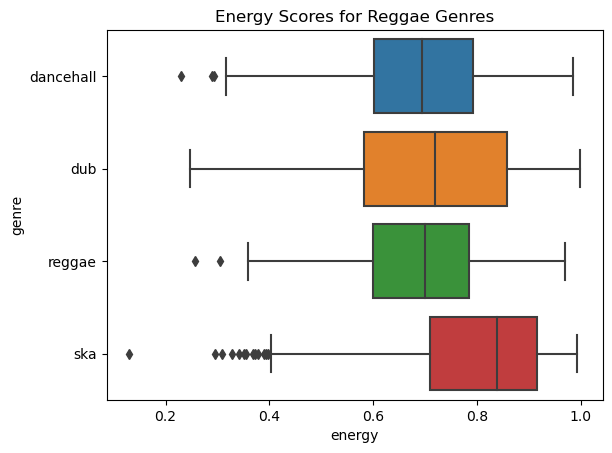

In [58]:
# Let's try ANOVA test with energy 
sns.boxplot(y='track_genre', x='energy', data=reggae_grouping, orient="h")
plt.ylabel("genre")
plt.xlabel("energy")
plt.title("Energy Scores for Reggae Genres")
plt.show()

We can see that they somewhat similar distributions with the mean and midde porition of the data of dancehall, dub, and reggae being closer together. 

In [59]:
# Getting the mean and variance of each of these genres' energy scores.
aggregate = reggae_grouping.groupby('track_genre').aggregate({"energy": ["mean", "var", "count"]})
display(aggregate)

energy                
                 mean       var count
track_genre                          
dancehall    0.689139  0.018117   833
dub          0.712441  0.030162   877
reggae       0.685133  0.019676   166
ska          0.799098  0.023062   724

With the exception of ska they all look fairly close to one another. Let's see the difference between them are statistically significant. 

In [60]:
# Looping through each genre in our reggae grouping (the 4 genres) and adding their energy scores to a dictionary
anova_data = {}
reggae_types = reggae_grouping['track_genre'].unique()

# slice out the energy score for each genre type
for genre in reggae_types:
    anova_data[genre] = reggae_grouping.loc[reggae_grouping['track_genre'] == genre, "energy"]

In [61]:
# Sanity check 
reggae_types

array(['dancehall', 'dub', 'reggae', 'ska'], dtype=object)

In [62]:
type(anova_data['reggae'])

pandas.core.series.Series

In [63]:
# The one-way ANOVA (f_oneway) tests the null hypothesis that two or more groups have the same population mean.
stats.f_oneway(anova_data["reggae"], 
               anova_data["dub"],
               anova_data["ska"],
               anova_data["dancehall"])

F_onewayResult(statistic=76.56324234529129, pvalue=1.8794170349298728e-47)

Our p-value is much lower than our threshold of 0.05. We can fail to reject our null hypothesis and say that there is a significant difference betweeen these genres' energy mean and variance. 

Let's try removing the genre whose distribution looks the most different: ska 

### Reggae, Dub, Dancehall 

In [64]:
# New reggae grouping
group = ['reggae', 'dub', 'dancehall']

In [65]:
# All the tracks with the above genres 
reggae_grouping = consolidated_spotify[consolidated_spotify['track_genre'].isin(group)]

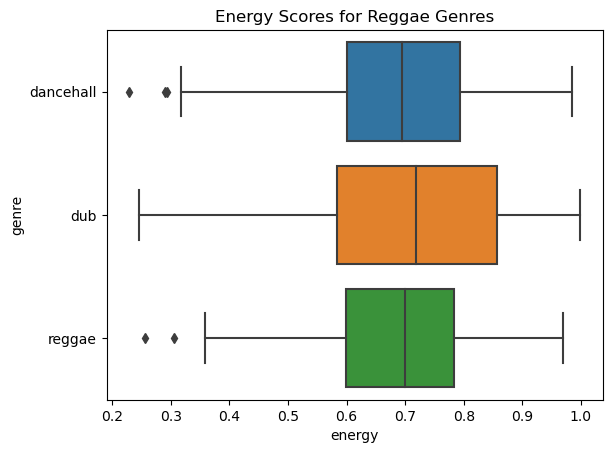

In [66]:
# Let's try ANOVA test with energy 
sns.boxplot(y='track_genre', x='energy', data=reggae_grouping, orient="h")
plt.ylabel("genre")
plt.xlabel("energy")
plt.title("Energy Scores for Reggae Genres")
plt.show()

We can see that these means are closer together. The middle portion of the data varies a bit.

In [67]:
# Getting the mean and variance of each of these genres' energy scores.
aggregate = reggae_grouping.groupby('track_genre').aggregate({"energy": ["mean", "var", "count"]})
display(aggregate)

energy                
                 mean       var count
track_genre                          
dancehall    0.689139  0.018117   833
dub          0.712441  0.030162   877
reggae       0.685133  0.019676   166

In [68]:
# Looping through each genre in our reggae grouping (the 3 genres) and adding their energy scores to a dictionary
anova_data = {}
reggae_types = reggae_grouping['track_genre'].unique()

# Slice out the energy score for each genre type
for genre in reggae_types:
    anova_data[genre] = reggae_grouping.loc[reggae_grouping['track_genre'] == genre, "energy"]

In [69]:
# Sanity check 
reggae_types

array(['dancehall', 'dub', 'reggae'], dtype=object)

In [70]:
type(anova_data['reggae'])

pandas.core.series.Series

In [71]:
# The one-way ANOVA (f_oneway) tests the null hypothesis that two or more groups have the same population mean.
stats.f_oneway(anova_data["reggae"], 
               anova_data["dub"],
               anova_data["dancehall"])

F_onewayResult(statistic=5.661867469799003, pvalue=0.0035357814062546493)

We can see that our p-value is getting higher which means that we are getting closer to being able to fail to reject our null hypothesis, however it is still under our threshold of 0.05 therefore we must reject the null hypothesis and say that our means and variance are indeed different. 

This time let's remove the dancehall genre based on our domain knowledge of reggae and dub. 

### Reggae and Dub

In [72]:
# New reduced grouping 
group = ['reggae', 'dub']

In [73]:
# All the tracks with the above genres 
reggae_grouping = consolidated_spotify[consolidated_spotify['track_genre'].isin(group)]

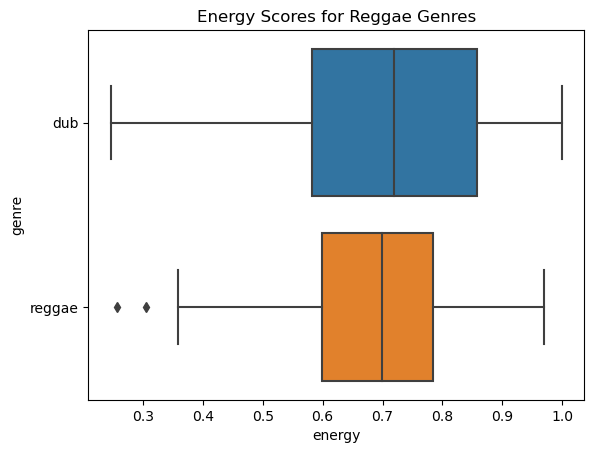

In [74]:
# Let's try ANOVA test with energy 
sns.boxplot(y='track_genre', x='energy', data=reggae_grouping, orient="h")
plt.ylabel("genre")
plt.xlabel("energy")
plt.title("Energy Scores for Reggae Genres")
plt.show()

In [75]:
# Getting the mean and variance of each of these genres' energy scores.
aggregate = reggae_grouping.groupby('track_genre').aggregate({"energy": ["mean", "var", "count"]})
display(aggregate)

energy                
                 mean       var count
track_genre                          
dub          0.712441  0.030162   877
reggae       0.685133  0.019676   166

In [76]:
# Looping through each genre in our reggae grouping (the remaining 2 genres) and adding their energy scores to a dictionary
anova_data = {}
reggae_types = reggae_grouping['track_genre'].unique()

# slice out the energy score for each genre type
for genre in reggae_types:
    anova_data[genre] = reggae_grouping.loc[reggae_grouping['track_genre'] == genre, "energy"]

In [77]:
# Sanity check 
reggae_types

array(['dub', 'reggae'], dtype=object)

In [78]:
type(anova_data['reggae'])

pandas.core.series.Series

In [79]:
# The one-way ANOVA (f_oneway) tests the null hypothesis that two or more groups have the same population mean.
stats.f_oneway(anova_data["reggae"], 
               anova_data["dub"],)

F_onewayResult(statistic=3.6524146742786776, pvalue=0.05626239650170969)

The test is conclusive with a threshold of 0.056, and we can finally fail to reject the null hypothesis. That is, there is statistically significant evidence that these genres are significantly similar to one another when it comes to the energy attribute. 

This is barely above our barely above our threshold, so let's see we combine reggae and dancehall instead if we get a higher p-value.


### Reggae and Dancehall

In [80]:
# Alternative reduced grouping 
group = ['reggae', 'dancehall']

In [81]:
# All the tracks with the above genres 
reggae_grouping = consolidated_spotify[consolidated_spotify['track_genre'].isin(group)]

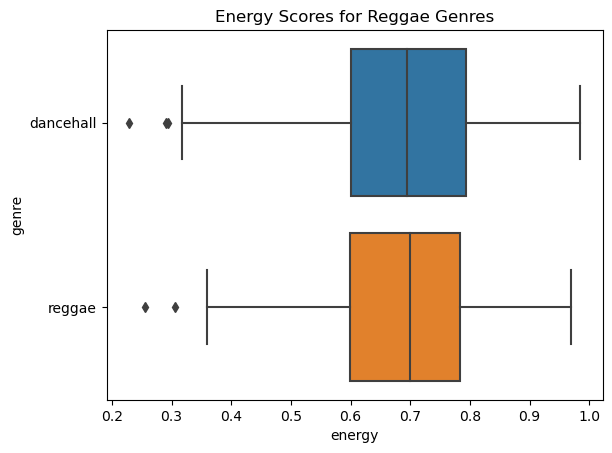

In [82]:
# Let's try ANOVA test with energy 
sns.boxplot(y='track_genre', x='energy', data=reggae_grouping, orient="h")
plt.ylabel("genre")
plt.xlabel("energy")
plt.title("Energy Scores for Reggae Genres")
plt.show()

In [83]:
# Getting the mean and variance of each of these genres' energy scores.
aggregate = reggae_grouping.groupby('track_genre').aggregate({"energy": ["mean", "var", "count"]})
display(aggregate)

energy                
                 mean       var count
track_genre                          
dancehall    0.689139  0.018117   833
reggae       0.685133  0.019676   166

We need a test that takes into account both the difference in means, the overall variance and the individual variances of the groups.

In [84]:
# Looping through each genre in our reggae grouping (the remaining 2 genres) and adding their energy scores to a dictionary
anova_data = {}
reggae_types = reggae_grouping['track_genre'].unique()

# slice out the energy score for each genre type
for genre in reggae_types:
    anova_data[genre] = reggae_grouping.loc[reggae_grouping['track_genre'] == genre, "energy"]

In [85]:
# Sanity check
reggae_types

array(['dancehall', 'reggae'], dtype=object)

In [86]:
type(anova_data['reggae'])

pandas.core.series.Series

In [87]:
# The one-way ANOVA (f_oneway) tests the null hypothesis that two or more groups have the same population mean.

stats.f_oneway(anova_data["reggae"], 
               anova_data["dancehall"],)

F_onewayResult(statistic=0.1209282031853603, pvalue=0.7281033526152962)

When we combine reggae and dancehall together we get our highest p-value in terms of energy. Either dub or dancehall could both pair well with reggae depending on the kind of songs that are in the dataset. 

With a high p-value of 0.73 we can more confindently fail to reject our null hypothesis. There is statistically signifcant evidence that these two genres' means and variance are similar. 

Now that we have decided on pairing together dancehall and reggae let's check out the distributions of all of their columns. 

track_genre
dancehall    36.067227
reggae       32.421687
Name: popularity, dtype: float64
track_genre
dancehall    198798.093637
reggae       221611.000000
Name: duration_ms, dtype: float64
track_genre
dancehall    0.320528
reggae       0.102410
Name: explicit, dtype: float64
track_genre
dancehall    0.726188
reggae       0.720277
Name: danceability, dtype: float64
track_genre
dancehall    0.689139
reggae       0.685133
Name: energy, dtype: float64
track_genre
dancehall    5.418968
reggae       5.746988
Name: key, dtype: float64
track_genre
dancehall   -6.145694
reggae      -6.005434
Name: loudness, dtype: float64
track_genre
dancehall    0.50060
reggae       0.60241
Name: mode, dtype: float64
track_genre
dancehall    0.195623
reggae       0.106258
Name: speechiness, dtype: float64
track_genre
dancehall    0.225067
reggae       0.210463
Name: acousticness, dtype: float64
track_genre
dancehall    0.007489
reggae       0.001451
Name: instrumentalness, dtype: float64
track_genre
dancehal

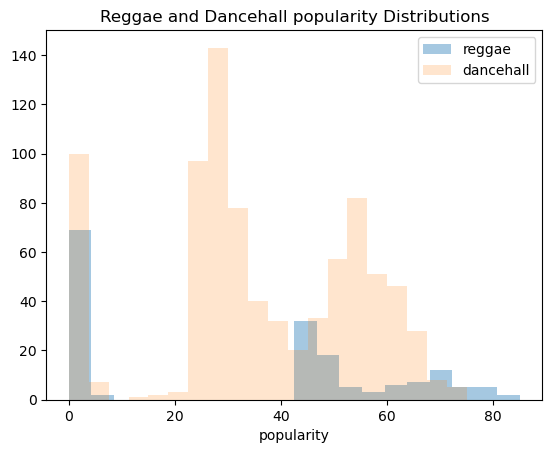

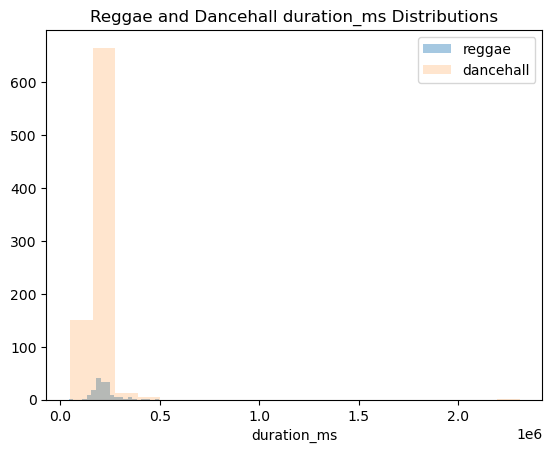

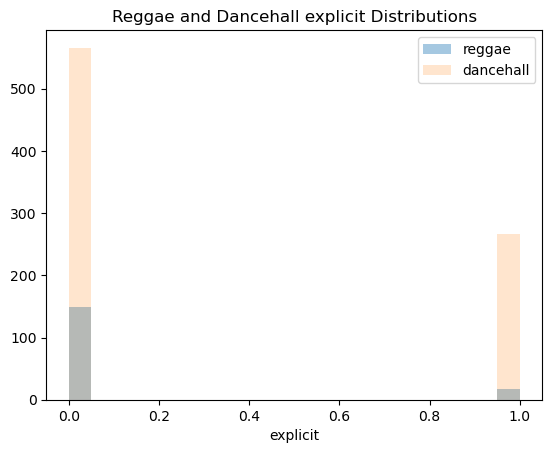

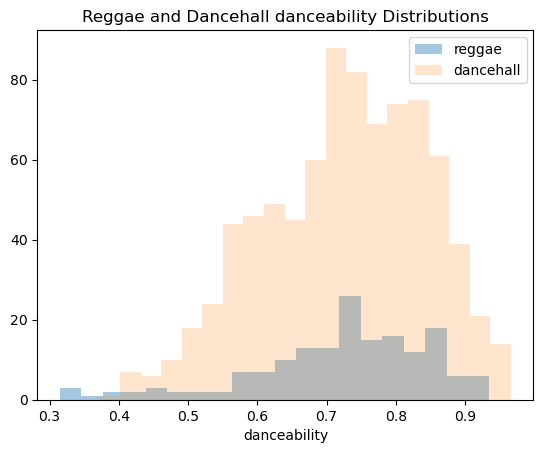

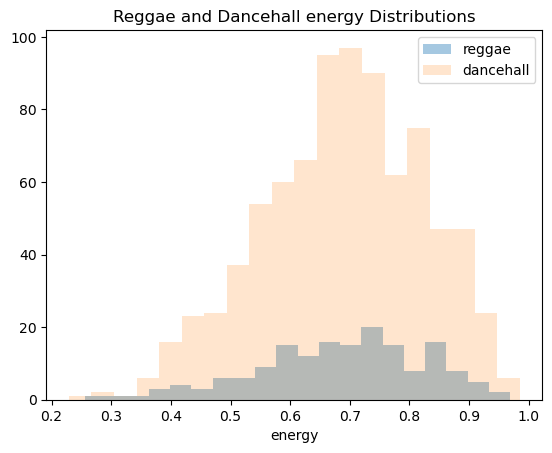

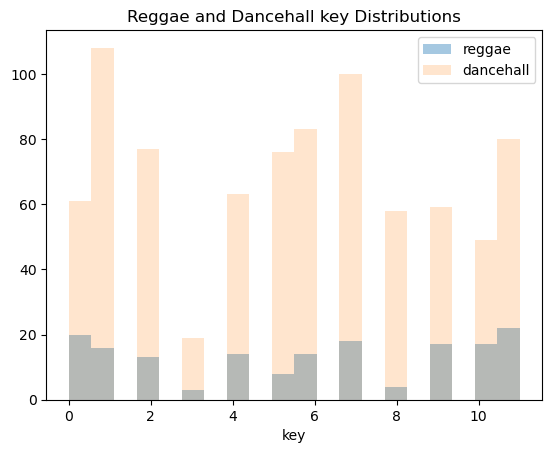

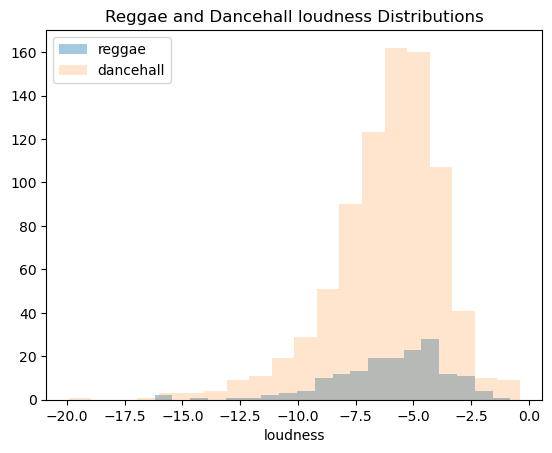

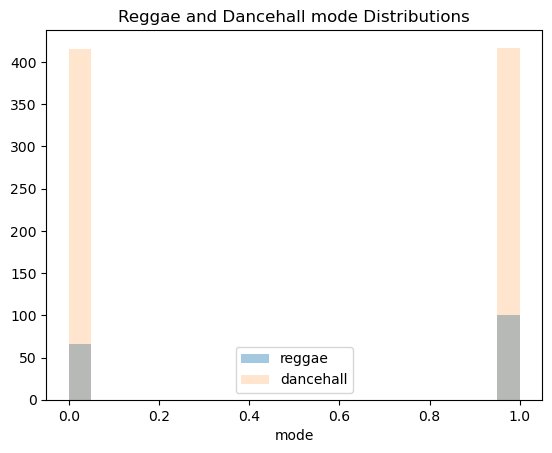

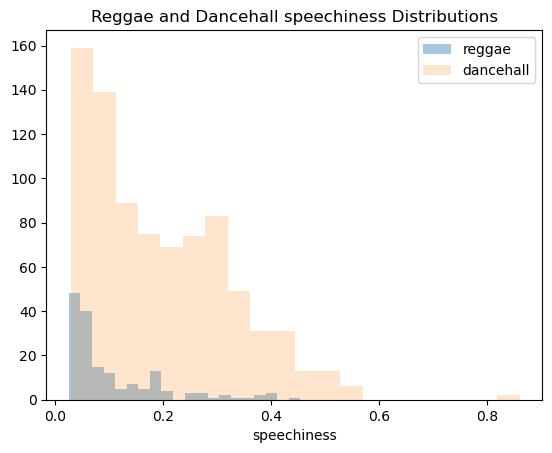

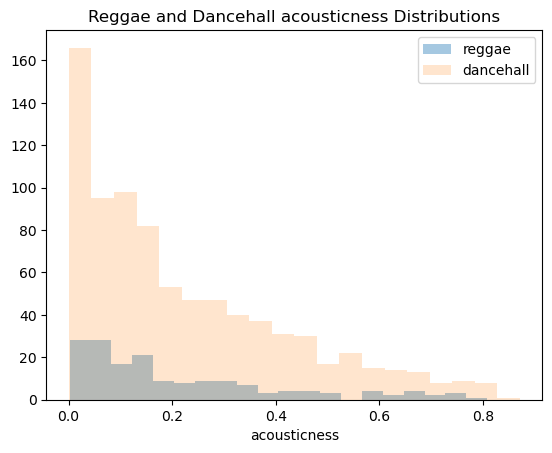

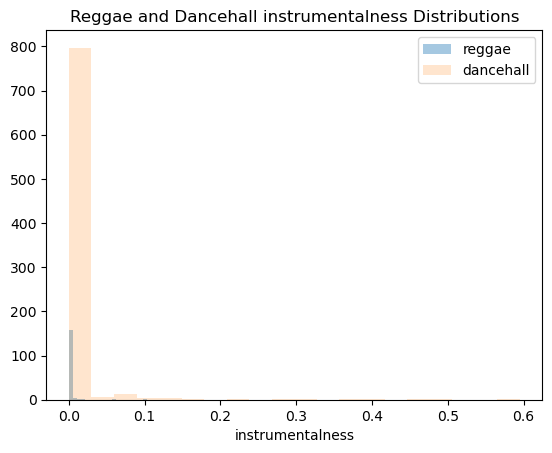

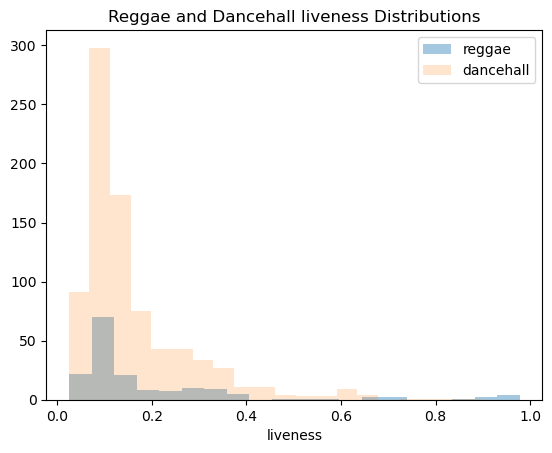

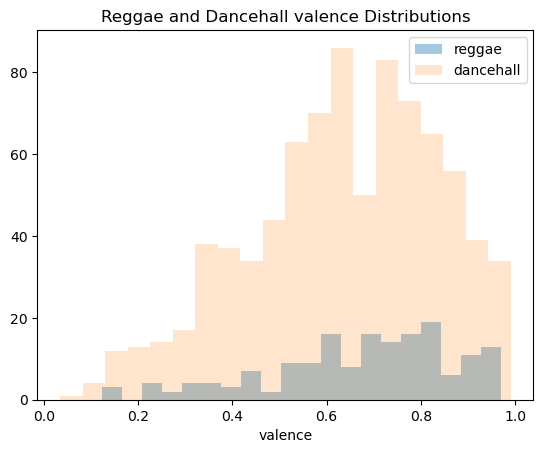

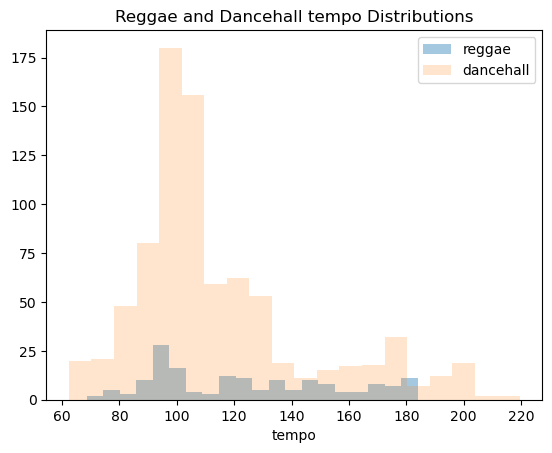

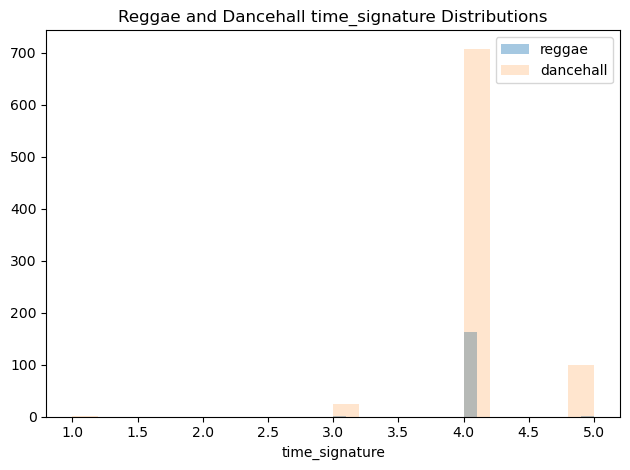

In [88]:
# Distributions of all features (reggae and dancehall)

plot_num = 1 

for col in reggae_grouping.select_dtypes(exclude='object'):
    plt.figure()
    plt.hist(reggae_grouping.loc[reggae_grouping["track_genre"] == 'reggae', col], bins=20, alpha=0.4, label="reggae")
    plt.hist(reggae_grouping.loc[reggae_grouping["track_genre"] == "dancehall", col], bins=20, alpha=0.2, label="dancehall")
    plt.legend()
    plt.xlabel(col)
    plt.title(f'Reggae and Dancehall {col} Distributions')
    
    plot_num +=1
    
    print(reggae_grouping.groupby("track_genre")[col].agg('mean', 'meadian'))
    
plt.tight_layout()

plt.show()

Based on the distributions above we can see that both reggae and dancehall have very similar distributions of the attributes.  We can feel confident in combining these two genres. 

In [89]:
# Combining reggae with dancehall by changing genre name 
consolidated_spotify['track_genre'] = consolidated_spotify['track_genre'].replace({'reggae': 'reggae_dancehall'})

In [90]:
# Combining reggae with dancehall by changing genre name 
consolidated_spotify['track_genre'] = consolidated_spotify['track_genre'].replace({'dancehall': 'reggae_dancehall'})

In [91]:
# Sanity check
consolidated_spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'breakbeat',
       'cantopop', 'chicago-house', 'classical', 'club', 'country',
       'dance', 'reggae_dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal',
       'hip-hop', 'honky-tonk', 'house', 'idm', 'indie-pop', 'indie',
       'industrial', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz',
       'k-pop', 'malay', 'mandopop', 'metal', 'metalcore',
       'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'pop-film',
       'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggaeton', 'rock-n-roll', 'rock', 'rockabilly',
       'salsa', 'samba', 'sertane

Let's move on to another genre that has a lot sub-genres in this dataset that we can potentially combine: pop.

Let's save what we've done so far to a new csv: consolidated_spotify.csv: 

In [103]:
consolidated_spotify.to_csv('~/Desktop/CapstoneProject/data/consolidated_spotify.csv', )

## Pop 

Pop will be the next genre that we will combine. 
- k-pop
- j-pop
- pop 
- power-pop*
- synth-pop
- pop-film
- indie-pop

We will continue in this notebook with genre consolidation. 